In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


In [2]:
data=pd.read_csv(r'/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
data.shape

(1000, 8)

In [4]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
data['Mean_score']=((data['math score'] + data['reading score'] + data['writing score'])/3).round()
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Mean_score
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0
2,female,group B,master's degree,standard,none,90,95,93,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0
4,male,group C,some college,standard,none,76,78,75,76.0


In [7]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
Mean_score                     0
dtype: int64

In [8]:
data.replace('?', np.nan)
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
Mean_score                     0
dtype: int64

In [10]:
duplicate_values=data.duplicated()
print("Duplicate values are :",duplicate_values)

Duplicate values are : 0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool


In [11]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [12]:
data.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Mean_score
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Gender Count')

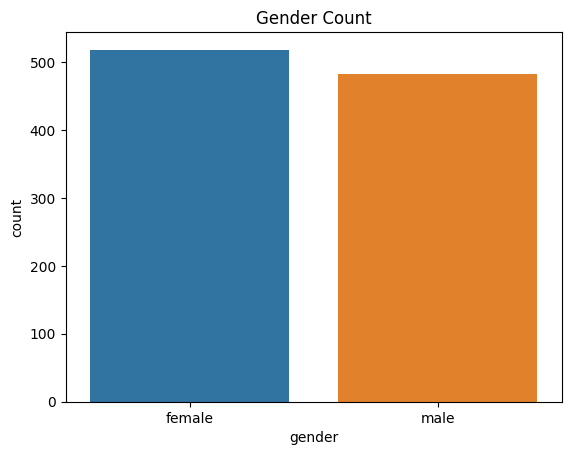

In [14]:
sns.countplot(x='gender', data=data)
plt.title("Gender Count")

In [15]:
data.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Mean_score
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0


Text(0.5, 1.0, 'Pie chart for Race count')

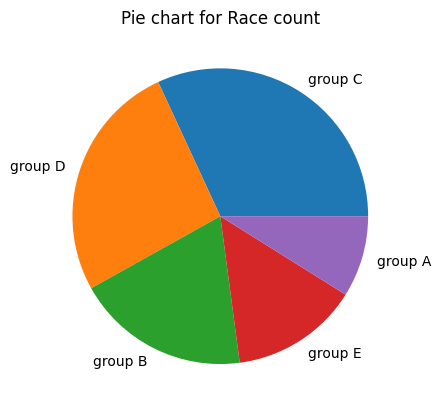

In [23]:
race_counts=data['race/ethnicity'].value_counts()

plt.pie(race_counts, labels=race_counts.index)
plt.title('Pie chart for Race count')

In [24]:
data.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Mean_score
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0


Text(0.5, 1.0, 'Count plot of parent qualification')

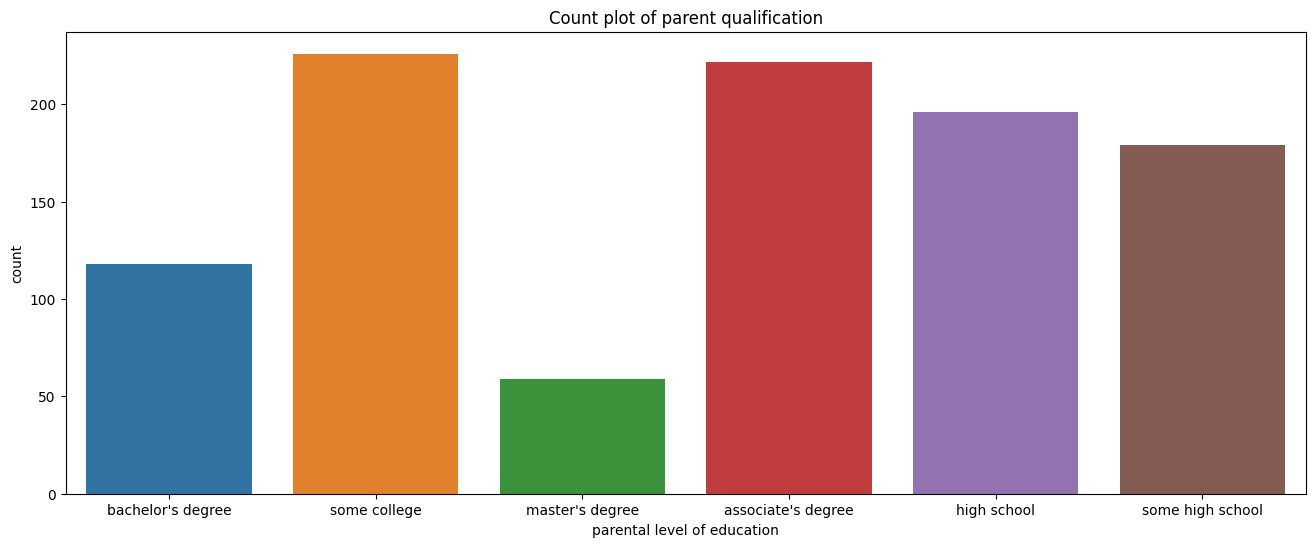

In [27]:
plt.figure(figsize=(16,6))
sns.countplot(x='parental level of education', data=data)
plt.title("Count plot of parent qualification")

In [28]:
data.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Mean_score
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0


<Axes: xlabel='lunch', ylabel='Mean_score'>

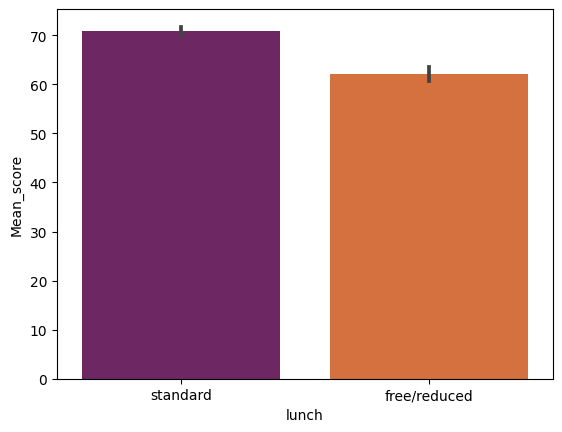

In [30]:
sns.barplot(x = data['lunch'], y = data['Mean_score'], palette = 'inferno')

In [31]:
data.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Mean_score
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0


Text(0.5, 1.0, 'Score based on preparation')

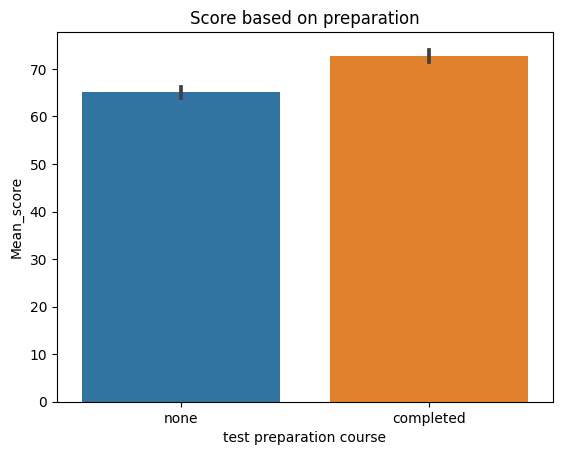

In [32]:
sns.barplot(x='test preparation course', y= 'Mean_score', data=data)
plt.title("Score based on preparation")

In [33]:
data.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Mean_score
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0


In [35]:
col_to_encode= ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

for col in col_to_encode:
    data[col]=lb.fit_transform(data[col])

print("Transformation sucessfull")

Transformation sucessfull


In [36]:
data.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Mean_score
0,0,1,1,1,1,72,72,74,73.0
1,0,2,4,1,0,69,90,88,82.0


<Axes: >

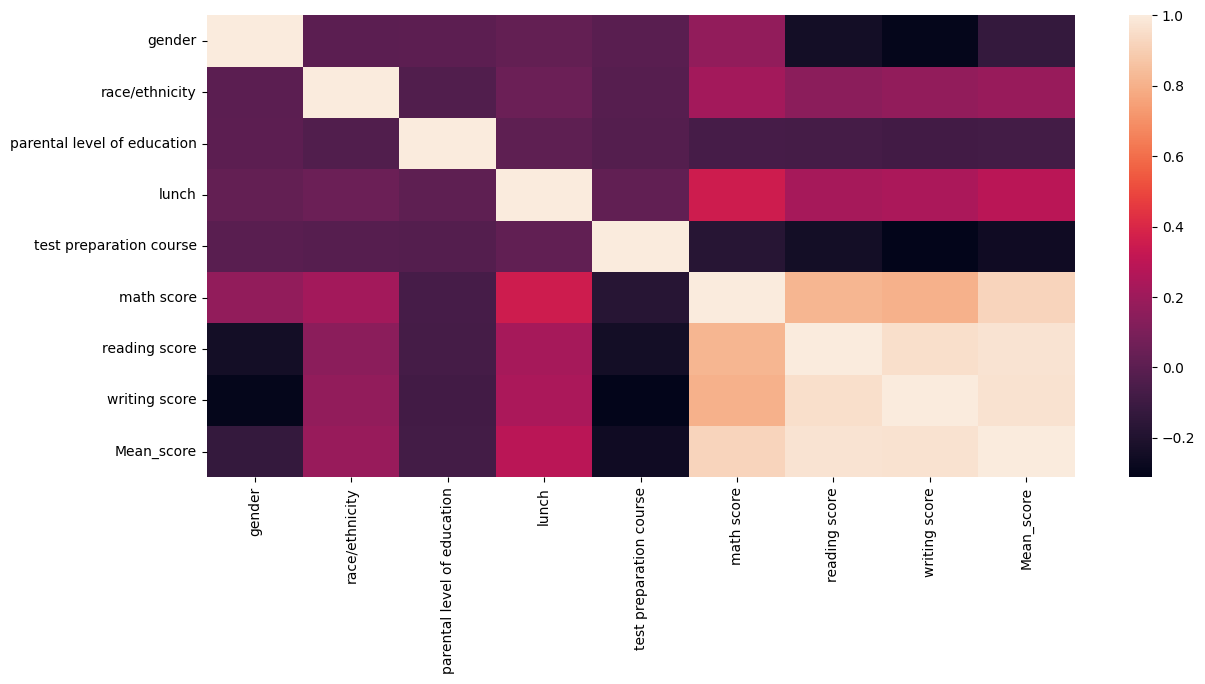

In [39]:
plt.figure(figsize=(14,6))
sns.heatmap(data.corr())

In [43]:
data=data.drop(['math score','reading score','writing score'], axis=1)
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,Mean_score
0,0,1,1,1,1,73.0
1,0,2,4,1,0,82.0
2,0,1,3,1,1,93.0
3,1,0,0,0,1,49.0
4,1,2,4,1,1,76.0


In [44]:
data.shape

(1000, 6)

In [45]:
x=data.iloc[:,:5]
x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,0,1,1,1,1
1,0,2,4,1,0
2,0,1,3,1,1
3,1,0,0,0,1
4,1,2,4,1,1


In [46]:
y=data.iloc[:,5:]
y.head()

,Mean_score
0,73.0
1,82.0
2,93.0
3,49.0
4,76.0


In [56]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [61]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge, ElasticNet, HuberRegressor, Lars, LassoLars, OrthogonalMatchingPursuit, PassiveAggressiveRegressor, RANSACRegressor, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [62]:
models = {'Linear Regression': LinearRegression(),
          'Ridge': Ridge(),
          'Lasso': Lasso(),
          'Bayesian Ridge': BayesianRidge(),
          'Elastic Net': ElasticNet(),
          'Huber Regressor': HuberRegressor(),
          'Lars': Lars(),
          'Lasso Lars': LassoLars(),
          'Orthogonal Matching Pursuit': OrthogonalMatchingPursuit(),
          'Passive Aggressive Regressor': PassiveAggressiveRegressor(),
          'RANSAC Regressor': RANSACRegressor(),
          'SGD Regressor': SGDRegressor(),
          'Decision Tree': DecisionTreeRegressor(),
          'Random Forest': RandomForestRegressor(),
          'Gradient Boosting': GradientBoostingRegressor(),
          'SVR': SVR(),
          'KNeighbors': KNeighborsRegressor(),
          'AdaBoost': AdaBoostRegressor(),
          'XGBoost': XGBRegressor()}


for model_name, model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    mse= mean_squared_error(y_test, y_pred)
    print(f"{model_name}- Mean Squared error: {mse}")

Linear Regression- Mean Squared error: 187.8271937182486
Ridge- Mean Squared error: 187.7240482248086
Lasso- Mean Squared error: 192.7831274823494
Bayesian Ridge- Mean Squared error: 187.37315433137312
Elastic Net- Mean Squared error: 199.37215219063845
Huber Regressor- Mean Squared error: 187.93825073191377
Lars- Mean Squared error: 187.82719371824857
Lasso Lars- Mean Squared error: 192.78312627098603
Orthogonal Matching Pursuit- Mean Squared error: 209.82184957799274
Passive Aggressive Regressor- Mean Squared error: 192.09316046538225


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RANSAC Regressor- Mean Squared error: 209.56552407404743
SGD Regressor- Mean Squared error: 191.66111885443365
Decision Tree- Mean Squared error: 234.67144574866194


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/tmp/ipykernel_42/1021223842.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


Random Forest- Mean Squared error: 222.98642871218286
Gradient Boosting- Mean Squared error: 194.67677189368757
SVR- Mean Squared error: 190.91003012573216
KNeighbors- Mean Squared error: 237.7354
AdaBoost- Mean Squared error: 192.51624821052363


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBoost- Mean Squared error: 232.11921568140278
